In [2]:
#Hi gang! I make vines. Lol lets go.

import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from random import randint
import random

(-1.4592143865404539, 3.4665197597937176, 3.7, 21.3)

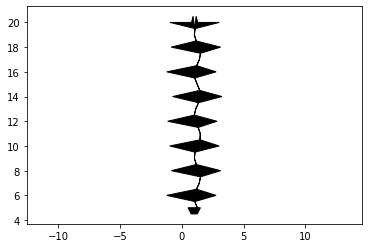

In [45]:
#Paramaters
random.seed(271) #make deterministic
top = 20
bot = 5
amp = 0.25
width = 0.5
omega = 1.89
res = 0.5
data = [3,1,2,3] #1 is left leaf, 2 is right, 3 is both
interval = 2

#Leaf param


#generate vine spine
spine = []
for i in np.linspace(bot,top,int(1 + (top-bot)/res)):
    spine.append([amp*np.sin(i * omega)+1, i])

#bottom
verts = []
x = spine[0][0]
y = spine[0][1]
verts.append([x - width, y])
verts.append([x - width/2, y -width])
verts.append([x, y-width])
verts.append([x + width/2, y-width])
verts.append([x + width, y])

#Work up the right side, adding leaves as needed
for i in spine:
    x = i[0]
    y = i[1]
    if (i[1]%interval)< 0.5*res:
        #Leaf time lets go
        verts.append([x+2, y])
    else:
        verts.append( [x+width/2,y])
        
#top
x = spine[-1][0]
y = spine[-1][1]
verts.append([x + width/2, y])
verts.append([x + width/4, y+width])
verts.append([x, y-width])
verts.append([x - width/4, y+width])
verts.append([x - width/2, y])

#down
for i in reversed(spine):
    x = i[0]
    y = i[1]
    if (i[1]%interval)< 0.5*res:
        #LEAF TIME
        verts.append([x-2, y])
    else:
        verts.append( [x+width/2,y])

polygon = verts
plt.fill(*zip(*polygon), color = 'black')
plt.axis('equal')